## Context:

Need to analyze the data set of XYZ company to understand the problem of earlier campaign response and provide the model to know the prediction of customer response to the campaigns. Earlier marketing campaigns have not been as effective as they were expected to be and propose data-driven solutions.

The Company wants to conduct a Campaign and the goal is to increase the number of member customer. Campaigns method based on the last campaign that most successful than the previous campaign and Consumer response will be predicted based on the profile and when the last consumer purchases.

There are some statistical analysis questions:
What factors are significantly related to the number of store purchases?
Which marketing campaign is most successful?
What does the average customer look like for this company?
Which products are performing best?
Investigate the differences in the customer characteristics and purchases behaviors between the most successful campaign and the rest campaigns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots 
import plotly.figure_factory as ff 
import shap
from scipy.stats import pearsonr
import plotly.graph_objects as go

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for PreProcessing steps
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,RobustScaler,MinMaxScaler,StandardScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# for Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# for Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# for Modeling, Fitting and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, roc_auc_score, plot_roc_curve,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, RFE
from datetime import datetime
import datetime
# for Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

#for saving the file
import pickle


In [2]:
#load sales data from csv file:
df = pd.read_csv('Sales_data.csv')

In [3]:
print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")

This dataset has  28  columns and  39983  rows.


In [4]:
print("Information about this dataset: ")
print(df.info())

Information about this dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39983 entries, 0 to 39982
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   39983 non-null  int64 
 1   Year_Birth           39983 non-null  int64 
 2   Education            39983 non-null  object
 3   Marital_Status       39983 non-null  object
 4    Income              39546 non-null  object
 5   Kidhome              39983 non-null  int64 
 6   Teenhome             39983 non-null  int64 
 7   Dt_Customer          39983 non-null  object
 8   Recency              39983 non-null  int64 
 9   MntWines             39983 non-null  int64 
 10  MntFruits            39983 non-null  int64 
 11  MntMeatProducts      39983 non-null  int64 
 12  MntFishProducts      39983 non-null  int64 
 13  MntSweetProducts     39983 non-null  int64 
 14  MntGoldProds         39983 non-null  int64 
 15  NumDealsPurchases   

## Features Information from Dataset:

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Tennhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

MntWines: Amount spent on wine in the last 2 years

MntFruits: Amount spent on fruits in the last 2 years

MntMeatProducts: Amount spent on meat in the last 2 years

MntFishProducts: Amount spent on fish in the last 2 years

MntSweetProducts: Amount spent on sweets in the last 2 years

MntGoldProds: Amount spent on gold in the last 2 years

NumDealsPurchase: Number of purchases made with a discount

NumWebPurchase: Number of purchases made through the company's web site

NumCatalogPurchase: Number of purchases made using a catalogue

NumStorePurchase: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company's web site in the last month

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain: 1 if customer complained in the last 2 years, 0 otherwise

Country: Customer's location

# Exploratory Data Analysis:

In [5]:
# check for any duplicates in data:
print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")

This dataset has  0  duplicated rows.


In [6]:
# checking the Customer's percentage accepted the campaign:
for col in ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']:
    print("Customer's percentage accepted the campaign " + col + " is " + str(df[col].sum() / len(df[col]) *100) + " %")

Customer's percentage accepted the campaign AcceptedCmp1 is 6.227646749868694 %
Customer's percentage accepted the campaign AcceptedCmp2 is 1.2905484831053198 %
Customer's percentage accepted the campaign AcceptedCmp3 is 7.080509216416978 %
Customer's percentage accepted the campaign AcceptedCmp4 is 7.550709051346822 %
Customer's percentage accepted the campaign AcceptedCmp5 is 7.138033664307331 %
Customer's percentage accepted the campaign Response is 11.252282219943476 %


In [7]:
# checking the null values:
df.isna().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
 Income                437
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
Complain                 0
Country                  0
dtype: int64

In [8]:
# Income column has 437 missing values

###### Assessment report:

After assessing the data, I found  several quality issues:
1. There is a space in front of the income’s column name
2. There are dollar signs is the values of Income column
3. Income’s type is string
4. The “Income” column has 437 missing values
5. Dt_Customer’s type is string
So our next step is to clean the data.

## Data Cleaning

In [9]:
# Removed the space from Income column name
df.rename(columns={' Income ':'Income'}, inplace=True)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [10]:
# Removed the dollar signs, spaces and commas in the values of Income column
df.Income = df.Income.str.replace(",", "")
df.Income = df.Income.str.strip('$')

In [11]:
# Make a copy of dataset
df_copy = df.copy()

In [12]:
# Change Income's type is string
# Remove missing values from Income column - used the median number to fill in.

In [13]:
# divide the data into two dataframes: one has income values, and the other doesn't.
have_income = df_copy[df_copy.Income.isnull()==False]
missing_income = df_copy[df_copy.Income.isnull()==True]

have_income.Income.median()
have_income.Income = have_income.Income.replace(".0", "")

In [14]:
# Convert the one that has income to int type
# give a string value of "0" to missing value, then we can convert it into int type
missing_income.Income = str(have_income.Income.median())
missing_income.Income = missing_income.Income.replace(".0", "")
missing_income.Income = missing_income.Income.astype(float)
missing_income.Income = missing_income.Income.astype(int)
missing_income.Income = missing_income.Income.apply(np.int64)
#missing_income.Income

In [15]:
#combine the data
df_copy = missing_income.append(have_income)
df_copy.Income = df_copy.Income.astype(float)
df_copy.Income = df_copy.Income.astype(int)
df_copy.Income = df_copy.Income.apply(np.int64)
#df_copy.Income

In [16]:
df_copy.Income.describe()

count     39983.000000
mean      52001.682390
std       21816.984693
min        1730.000000
25%       35688.000000
50%       51518.000000
75%       68148.000000
max      704323.000000
Name: Income, dtype: float64

In [17]:
# Change Dt_Customer's type from string to datetime
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39983 entries, 134 to 39982
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   39983 non-null  int64         
 1   Year_Birth           39983 non-null  int64         
 2   Education            39983 non-null  object        
 3   Marital_Status       39983 non-null  object        
 4   Income               39983 non-null  int64         
 5   Kidhome              39983 non-null  int64         
 6   Teenhome             39983 non-null  int64         
 7   Dt_Customer          39983 non-null  datetime64[ns]
 8   Recency              39983 non-null  int64         
 9   MntWines             39983 non-null  int64         
 10  MntFruits            39983 non-null  int64         
 11  MntMeatProducts      39983 non-null  int64         
 12  MntFishProducts      39983 non-null  int64         
 13  MntSweetProducts     39983 no

In [19]:
# Find Numerical and Categorical features
numerical = [features for features in df_copy.columns if df_copy[features].dtypes != 'O'] 

categorical = [features for features in df_copy.columns if df_copy[features].dtypes == 'O']

print('Numerical Features are : ')
print(numerical)
print()
print('Categorical Features are : ')
print(categorical)

Numerical Features are : 
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']

Categorical Features are : 
['Education', 'Marital_Status', 'Country']


Are there any outliers? How will we wrangle/handle them?

Are there any useful variables that we can engineer with the given data?

Any patterns or anomalies in the data? Can we plot them?

# See if there are any outliers
The boxplots to visualize all the numerical features, and it will show the 5 numbers of the data: the lowest number that is not an outlier, Q1(25th percentile), Q2(50th percentile), Q3(75th percentile), and the highest number that is not an outlier.

Text(0.5, 0.9, 'Find Outliers')

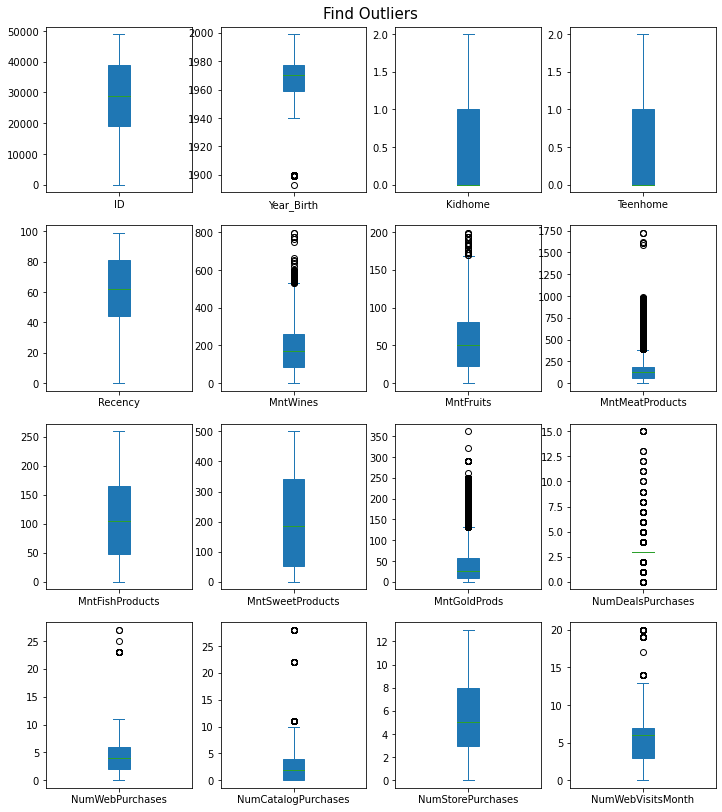

In [20]:
# select columns to plot
df_to_plot = df.drop(columns= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
#plt.savefig('boxplots.png', bbox_inches='tight')

In [21]:
# Remove outliers in year_birth
df_copy.Year_Birth.describe()

count    39983.000000
mean      1968.779806
std         11.925810
min       1893.000000
25%       1959.000000
50%       1970.000000
75%       1977.000000
max       1999.000000
Name: Year_Birth, dtype: float64

In [22]:
# Outliers mean they are below or above 3 standard deviations from the mean.
df_copy = df_copy[df_copy.Year_Birth >= (df_copy.Year_Birth.mean()-3*df_copy.Year_Birth.std())]

In [23]:
df_copy.Year_Birth.describe()

count    39935.000000
mean      1968.863253
std         11.687349
min       1940.000000
25%       1959.000000
50%       1970.000000
75%       1977.000000
max       1999.000000
Name: Year_Birth, dtype: float64

In [24]:
# Categorical features : Univariate analysis

In [25]:
# Categorical Data Description
df_copy.describe(include='O').T

count unique         top   freq
Education       39935      5  Graduation  20588
Marital_Status  39935      8     Married  14899
Country         39935      8          SP  19678

In [26]:
def CatBar(df_copy,feature):
    fig = df_copy[feature].value_counts().plot.bar()
    fig.set_title(feature)
    fig.set_ylabel('Number')
    plt.show()

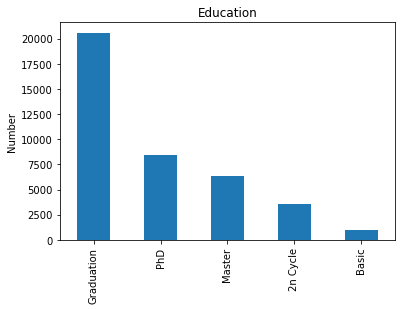

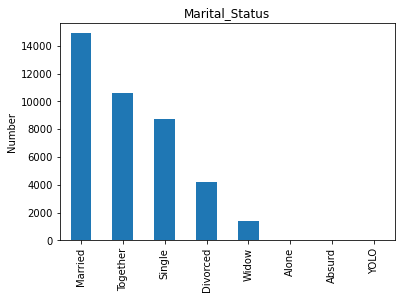

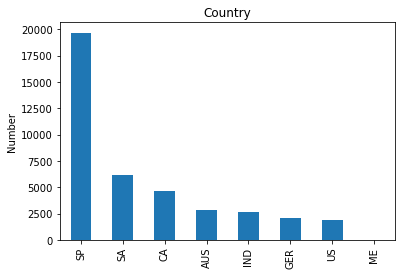

In [27]:
for f in categorical:
    CatBar(df_copy,f)

<AxesSubplot:xlabel='Education'>

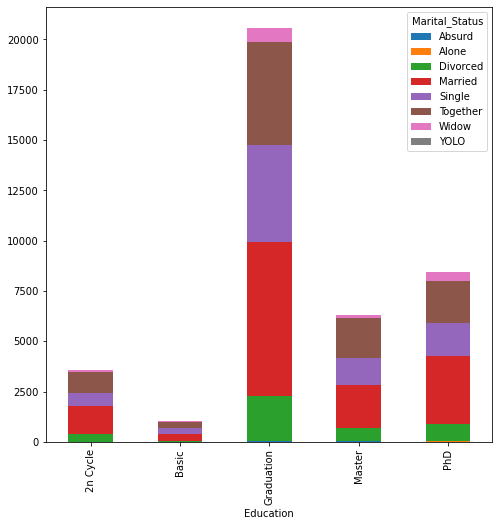

In [28]:
# customers distribution based on education and marital status
pd.crosstab(index= df_copy['Education'] , columns=df_copy['Marital_Status']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [29]:
# Lets check categorical features relation with Response numerical feature. Also lets see who has responded in which attempt

<AxesSubplot:xlabel='Education'>

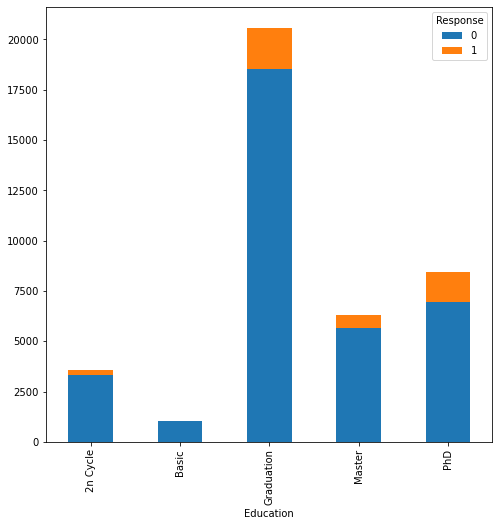

In [30]:
pd.crosstab(index= df_copy['Education'] , columns=df_copy['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [31]:
#Summarizing Categories from Marital_Status and divide them in 3 categories
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace(['Widow','Divorced','Alone'],'Single')
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace(['Together'],'Married')
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace(['Absurd','YOLO'],'Other')

<AxesSubplot:xlabel='Marital_Status'>

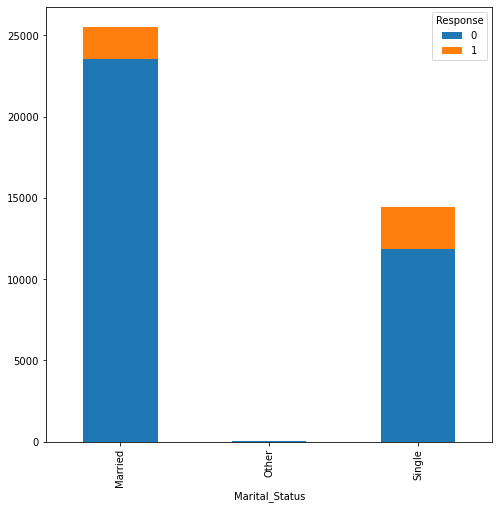

In [32]:
pd.crosstab(index= df_copy['Marital_Status'] , columns=df_copy['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<AxesSubplot:xlabel='Country'>

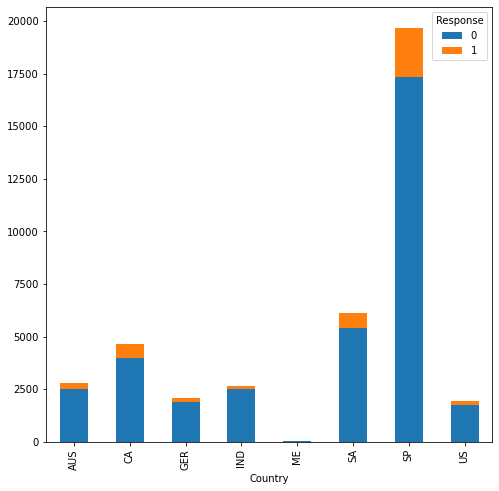

In [33]:
pd.crosstab(index= df_copy['Country'] , columns=df_copy['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

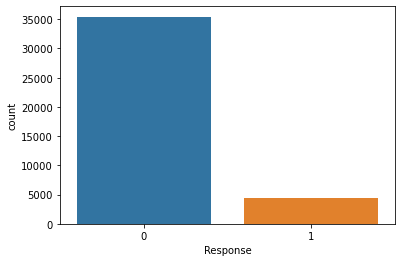

In [34]:
# Plot Response variable seperately because our target variable(Class) is int 
sns.countplot(df_copy['Response'])
plt.show()

In [35]:
# print percentage of response where target == 1
(len(df_copy.loc[df_copy.Response==1])) / (len(df_copy.loc[df_copy.Response == 0])) * 100

12.696128231177333

In [36]:
df_copy.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
134  8996        1957         PhD        Married   51518        2         1   
262  1994        1983  Graduation        Married   51518        1         0   
394  3769        1972         PhD        Married   51518        1         0   
449  5255        1986  Graduation         Single   51518        1         0   
525  8268        1961         PhD        Married   51518        0         1   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
134  2012-11-19        4        75         42              192   
262  2013-11-15       11        57          5                6   
394  2003-02-14       17       126          1               13   
449  2013-02-20       19       311          1                3   
525  2007-11-13       23       250          0               27   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
134               49                37            53                 12   
262                0                 2             1                  1   
394                0                 0             3                  1   
449                3               263           362                  0   
525               10                 0            15                  3   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
134                7                    2                  8   
262                1                    0                  2   
394                1                    0                  3   
449               27                    0                  0   
525                6                    1                  7   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
134                  9             0             0             0   
262                  7             0             0             0   
394                  7             0             0             0   
449                  1             0             0             0   
525                  6             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain Country  
134             0             0         0         0     GER  
262             0             0         0         0      US  
394             0             0         0         0     AUS  
449             0             0         0         0     AUS  
525             0             0         0         0      CA

In [37]:
# Calculate the ages of customers
df_copy['Ages'] = 2022 - df_copy['Year_Birth']

In [38]:
df_copy = df_copy.drop(['Year_Birth'], axis=1) # Drop original column 'Year_Birth'

In [39]:
#Categorized the ages in 4 Age_Group:
bins = [0, 20, 40, 60, 121]
labels = ['Youth', 'Adult', 'Mature', 'Senior']

df_copy['Age_Group'] = pd.cut(df_copy['Ages'], bins = bins, labels = labels, right=False)

In [40]:
# Create new features
df_copy["Join_year"] = df_copy.Dt_Customer.dt.year
df_copy["Join_month"] = df_copy.Dt_Customer.dt.month
df_copy["Join_weekday"] = df_copy.Dt_Customer.dt.weekday
df_copy["Dependents"] = df_copy.Kidhome + df_copy.Teenhome
df_copy['Total_Mnt'] = df_copy.MntWines+ df_copy.MntFruits+ df_copy.MntMeatProducts+ df_copy.MntFishProducts+ df_copy.MntSweetProducts+ df_copy.MntGoldProds 
df_copy['Total_num_purchase'] = df_copy.NumDealsPurchases+ df_copy.NumWebPurchases+ df_copy.NumCatalogPurchases+ df_copy.NumStorePurchases+ df_copy.NumWebVisitsMonth 
df_copy['Total_accept'] = df_copy.AcceptedCmp1 + df_copy.AcceptedCmp2 + df_copy.AcceptedCmp2 + df_copy.AcceptedCmp2  + df_copy.AcceptedCmp3 + df_copy.AcceptedCmp4 + df_copy.AcceptedCmp5 + df_copy.Response
df_copy['AOV'] = (df_copy.Total_Mnt/df_copy.Total_num_purchase)


In [41]:
#change customer join date to how long customer has joined
today = pd.Timestamp('20/2/22') 
df_copy['Dt_Customer'] = (today - df_copy['Dt_Customer']).dt.days

In [42]:
df_copy.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Ages', 'Age_Group', 'Join_year',
       'Join_month', 'Join_weekday', 'Dependents', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

In [43]:
# Categorical Data Description
df_copy.describe(include='O').T

count unique         top   freq
Education       39935      5  Graduation  20588
Marital_Status  39935      3     Married  25477
Country         39935      8          SP  19678

In [44]:
# saving the dataframe file:
df_copy.to_csv('df_copy.csv', index=False)

From the responses, how many are responded in first , second or last attempt etc. 

In [45]:
# To do that lets create data subset with positive response
data_y = df_copy[df_copy.Response == 1]
data_y.shape

(4499, 37)

In [46]:
# Lets check for first attempt
pd.crosstab(index= data_y['AcceptedCmp1'] , columns=data_y['Marital_Status'])

Marital_Status  Married  Other  Single
AcceptedCmp1                          
0                  1247      1    2068
1                   687     24     472

In [47]:
pd.crosstab(index= data_y['AcceptedCmp1'] , columns=data_y['Education'])

Education     2n Cycle  Basic  Graduation  Master   PhD
AcceptedCmp1                                           
0                  200      2        1379     511  1224
1                   76      0         684     172   251

In [48]:
 # Second and other attempts

In [49]:
def create_cross(df_copy,feature,target):
    x = pd.crosstab(df_copy[feature] , df_copy[target])
    print(x)

In [50]:
features = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
for f in features:
    print(f)
    print('-------------------------------------------------------------')
    create_cross(df, f , 'Education')
    print('-------------------------------------------------------------')

AcceptedCmp1
-------------------------------------------------------------
Education     2n Cycle  Basic  Graduation  Master   PhD
AcceptedCmp1                                           
0                 3358   1018       19103    5976  8038
1                  244      0        1485     340   421
-------------------------------------------------------------
AcceptedCmp2
-------------------------------------------------------------
Education     2n Cycle  Basic  Graduation  Master   PhD
AcceptedCmp2                                           
0                 3553   1018       20319    6268  8309
1                   49      0         269      48   150
-------------------------------------------------------------
AcceptedCmp3
-------------------------------------------------------------
Education     2n Cycle  Basic  Graduation  Master   PhD
AcceptedCmp3                                           
0                 3402    920       19154    5919  7757
1                  200     98      

In [51]:
# analysing the complain column
df_copy[df_copy.Complain > 0].ID.nunique()

389

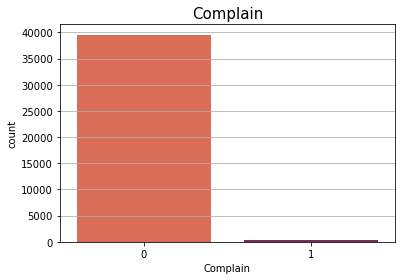

In [52]:
plt.grid();
plt.title('Complain',size=15);
sns.countplot(x = df_copy['Complain'],palette = 'rocket_r');

<AxesSubplot:xlabel='Complain', ylabel='count'>

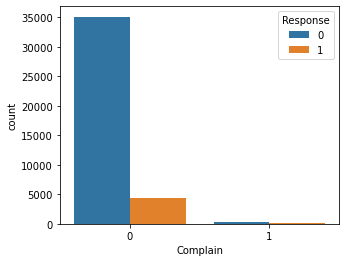

In [53]:
# Campaign Response based on Complain record 
fig, ax=plt.subplots(figsize=(5,4))
sns.countplot(x="Complain",hue='Response', data=df_copy)

In [54]:
create_cross(df_copy, 'Complain' , 'Response')

Response      0     1
Complain             
0         35119  4427
1           317    72


## Data Visualisation

To identify paterns, we will first identify feature correlation. We will use the clustermap below for that; where darker means positive correlation and lighter represents negative correlation.


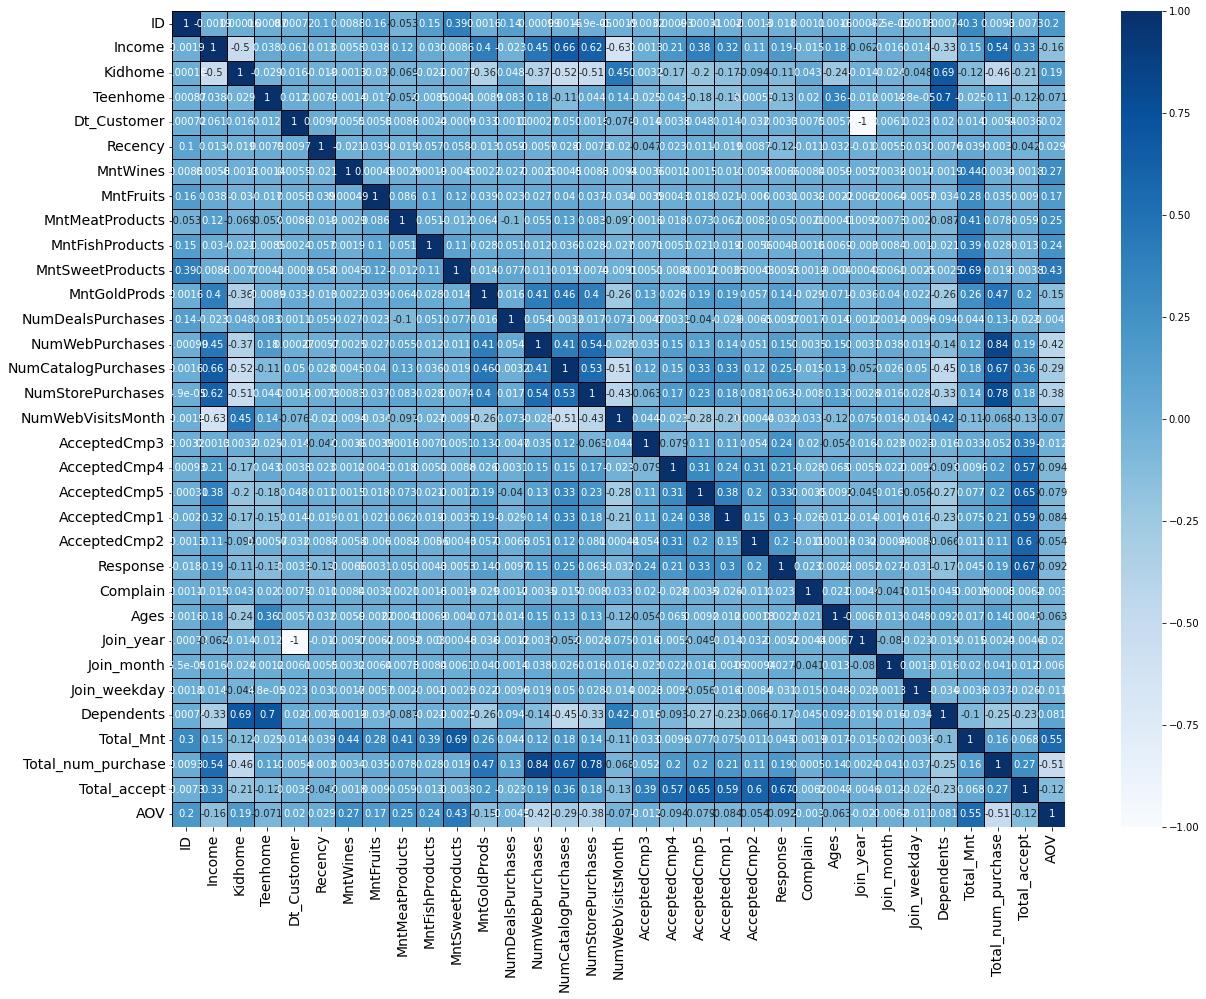

In [55]:
# set width and height 
f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(15) 

# create matrix
sns.heatmap(df_copy.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'Blues', linewidths=1, linecolor='black')
# Make x and y descriptions larger so they are easier to read
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [56]:
corr = df_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)

fig = ff.create_annotated_heatmap(z=np.round(df_mask.to_numpy(), 2), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.diverging.RdBu,
                                  hoverinfo="none",
                                  showscale=True, ygap=1, xgap=1
                                 )

fig.update_xaxes(side="bottom")

fig.update_layout(
    title_text='Heatmap', 
    title_x=0.5, 
    width=1000, 
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white')

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""
    fig.layout.annotations[i].font.size = 6
fig.show()

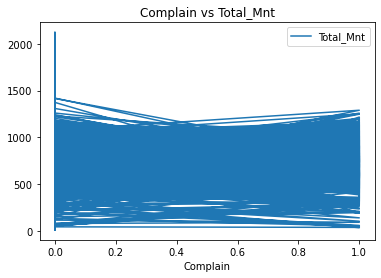

In [57]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
df_copy.plot(x='Complain', y='Total_Mnt', kind='line')
plt.title("Complain vs Total_Mnt");

<AxesSubplot:xlabel='Total_Mnt'>

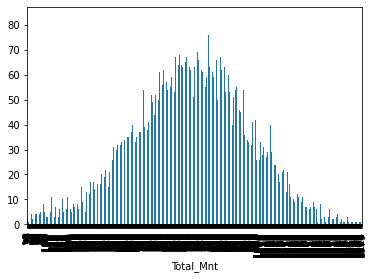

In [58]:
# Visualize the total amount spend by customers
df_copy.groupby('Total_Mnt')['ID'].count().plot(kind='bar')

In [59]:
# correlation between complains and toatal amount spend
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=df_copy['Complain'], y=df_copy['Total_Mnt'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.0019467058754770849
Pearson p-value:  0.697266604926924


In [60]:
# number of deals purchases by customers
df_copy['NumDealsPurchases'].head()

134    12
262     1
394     1
449     0
525     3
Name: NumDealsPurchases, dtype: int64

<AxesSubplot:xlabel='NumDealsPurchases'>

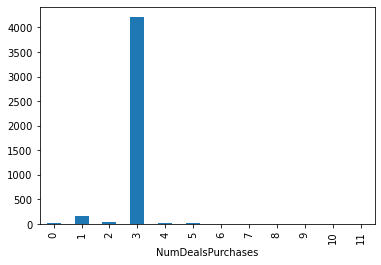

In [61]:
# visualize number of deals purchased by customers
data_y.groupby('NumDealsPurchases')['ID'].count().plot(kind='bar')

<AxesSubplot:xlabel='NumWebPurchases'>

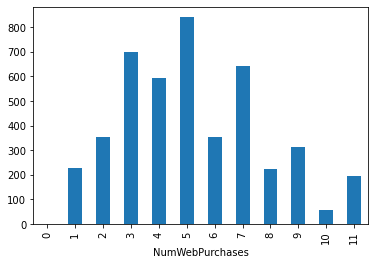

In [62]:
# visualize number of web purchases by customers
data_y.groupby('NumWebPurchases')['ID'].count().plot(kind='bar')

<AxesSubplot:xlabel='NumCatalogPurchases'>

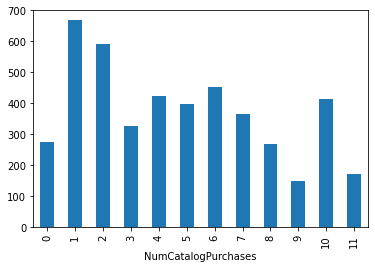

In [63]:
# visualize number of Catalog purchases by customers
data_y.groupby('NumCatalogPurchases')['ID'].count().plot(kind='bar')

<AxesSubplot:xlabel='NumStorePurchases'>

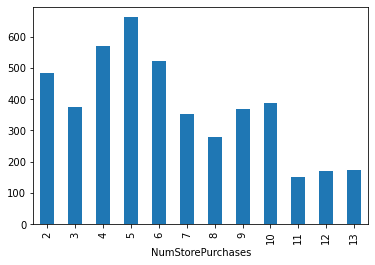

In [64]:
## visualize number of store purchases by customers
data_y.groupby('NumStorePurchases')['ID'].count().plot(kind='bar')

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

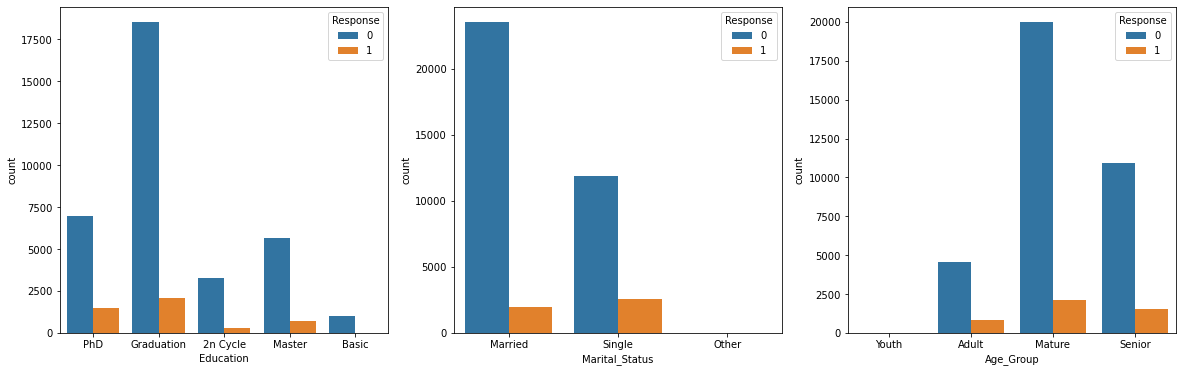

In [65]:
# Plotting some categorical variables to observe their relationship with the response variable

# Campaign Response based on education, marital status, year of customer acquisition
fig, axs=plt.subplots(ncols=3, figsize=(20,6)) 
sns.countplot(x="Education", hue="Response", data=df_copy, ax=axs[0])
sns.countplot(x="Marital_Status", hue="Response", data=df_copy, ax=axs[1])
sns.countplot(x="Age_Group", hue="Response", data=df_copy, ax=axs[2])


In [66]:
sns.countplot(x="Join_year", hue="Response", data=df_copy, ax=axs[0])

<AxesSubplot:xlabel='Join_year', ylabel='count'>

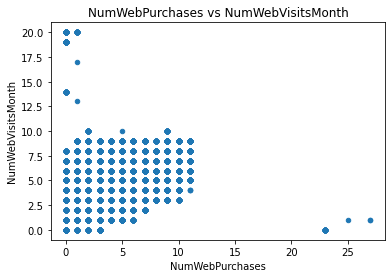

In [67]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
df_copy.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("NumWebPurchases vs NumWebVisitsMonth");

Text(0.5, 1.0, 'NumWebPurchases vs NumWebVisitsMonth')

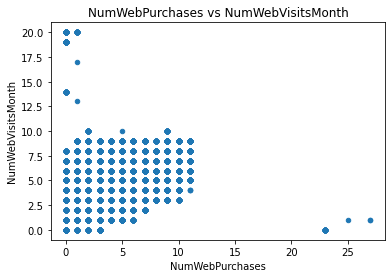

In [68]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
df_copy.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("NumWebPurchases vs NumWebVisitsMonth")

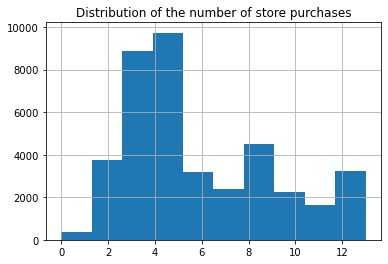

In [69]:
df_copy.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases");

In [70]:
# drop ID as everyone has unique ID
rd_df = df_copy.drop(columns=['ID'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)
# One-hot encoding
rd_df = pd.get_dummies(rd_df)
# Split the dataset into X , y
X=rd_df.drop(columns=['NumStorePurchases'])  # Features
y=rd_df['NumStorePurchases']  # Labels

In [71]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

In [72]:
# Create a Random Forest Classifier 
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)

# Train the model using the training sets 
rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.037667556965194894
Mean Squared Error: 0.0705405955262499
Root Mean Squared Error: 0.2655947957439112


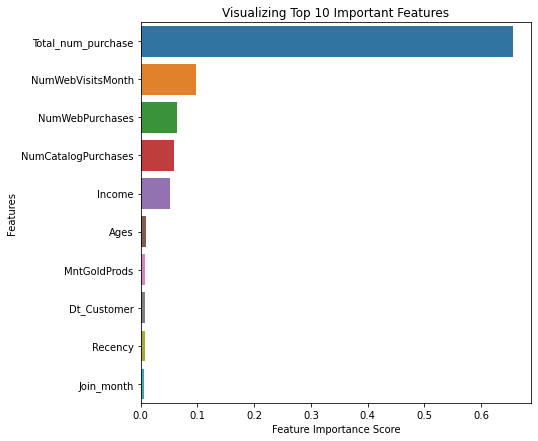

In [74]:
# find feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

The top 5 factors are

Total number of purchases.
Number of visits to company's web site.
Total number of purchases through website.
Number of purchases made using a catalog
Income

Text(0, 0.5, 'Average Order Volume')

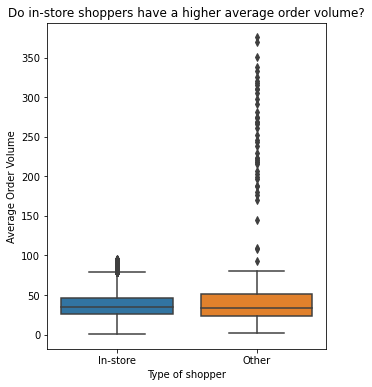

In [75]:
# visualize In-store shoppers and other type of shoppers
store_shoppers = df_copy[df_copy.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = df_copy[df_copy.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Do in-store shoppers have a higher average order volume?")
sns.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Average Order Volume")


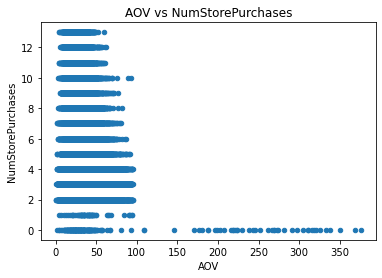

In [76]:
# Visualize MntGoldProds vs NumStorePurchases
all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");

In [77]:
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['AOV'], y=all_shoppers['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.4088098981519002
Pearson p-value:  0.0


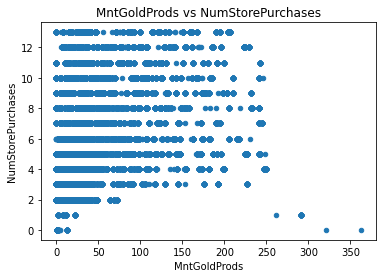

In [78]:
# Visualize MntGoldProds vs NumStorePurchases
df_copy.plot(x='MntGoldProds', y='NumStorePurchases', kind='scatter')
plt.title("MntGoldProds vs NumStorePurchases");
#plt.savefig('MntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

In [79]:
r, p_value  =  pearsonr(x=df_copy['MntGoldProds'], y=df_copy['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.40050822058262203
Pearson p-value:  0.0


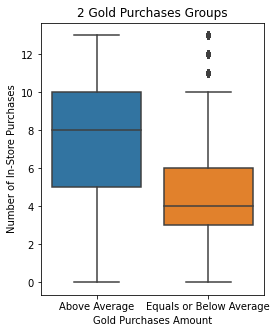

In [80]:
# In store purchases of gold products:
gold_above_avg =  df_copy[df_copy.MntGoldProds > df_copy.MntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"
gold_equ_or_below_avg =  df_copy[df_copy.MntGoldProds <= df_copy.MntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize = (4, 5))
df_gold = gold_above_avg.append(gold_equ_or_below_avg)
plt.title("2 Gold Purchases Groups")
sns.boxplot(data = df_gold, x = 'Gold Purchases Amount', y = 'NumStorePurchases')
plt.ylabel("Number of In-Store Purchases");

Text(0, 0.5, 'Campaign')

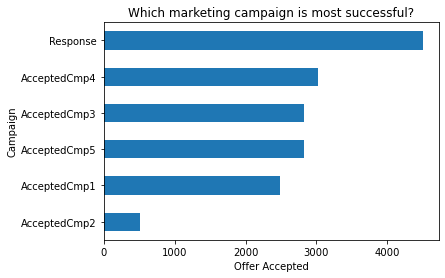

In [81]:
df_copy[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")

In [82]:
df_copy.replace([np.inf, -np.inf], 0, inplace=True)

In [83]:
df_copy.mean()

ID                     28692.217378
Income                 51991.375911
Kidhome                    0.451884
Teenhome                   0.512783
Dt_Customer             4110.170828
Recency                   61.751722
MntWines                 175.692726
MntFruits                 52.272468
MntMeatProducts          129.189808
MntFishProducts          106.638437
MntSweetProducts         205.979742
MntGoldProds              44.998748
NumDealsPurchases          2.966170
NumWebPurchases            4.071166
NumCatalogPurchases        2.684537
NumStorePurchases          5.806260
NumWebVisitsMonth          5.294904
AcceptedCmp3               0.070890
AcceptedCmp4               0.075598
AcceptedCmp5               0.070865
AcceptedCmp1               0.062351
AcceptedCmp2               0.012921
Response                   0.112658
Complain                   0.009741
Ages                      53.136747
Join_year               2010.380118
Join_month                 6.503293
Join_weekday               3

In [84]:
# list of cols with binary responses
binary_cols = [col for col in df_copy.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in df_copy.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df_copy.columns if 'Num' in col] + ['Total_num_purchase', 'Total_accept']

In [85]:
# average customer demographics
demographics = pd.DataFrame(round(df_copy.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Ages', 'Join_year', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

Average
Ages           53.1
Join_year    2010.4
Income      51991.4
Dependents      1.0
Kidhome         0.5
Teenhome        0.5
Recency        61.8

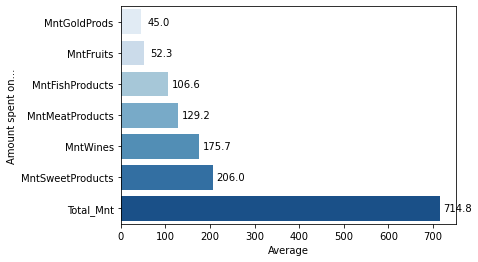

In [86]:
# spending habit of customers 
spending = pd.DataFrame(round(df_copy[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

Which marketing channels are underperforming? Catalog is the most underperforming channel.

Text(0, 0.5, 'Channel')

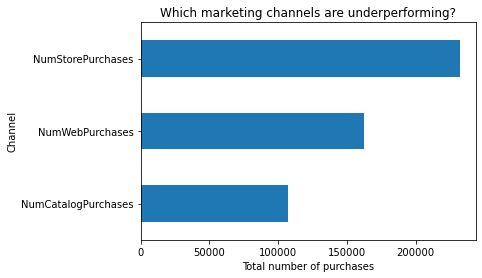

In [87]:
df_copy[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")

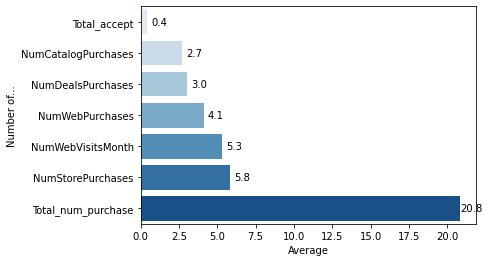

In [88]:
channels = pd.DataFrame(round(df_copy[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

In [89]:
# create 2 groups that accepted the offers from the last campaign and the campaign 1-5
cp_last = df_copy[df_copy.Response > 0]
cp__the_rest = df_copy[df_copy.AcceptedCmp2 == 0]

cp_last.shape[0], cp__the_rest.shape[0]

(4499, 39419)

In [90]:
df_copy.Country.value_counts()

SP     19678
SA      6132
CA      4638
AUS     2805
IND     2655
GER     2075
US      1926
ME        26
Name: Country, dtype: int64

In [91]:
# remove the overlapping customers who accepted offers from both cp_last and cp__the_rest so that twe can see the clear differences between these two groups
cp__the_rest2 = cp__the_rest
for i in list(cp__the_rest.Ages):
    if i in list(cp_last.Ages):
        cp__the_rest2 = cp__the_rest2[cp__the_rest2.Ages != i]
        
cp_last.shape[0], cp__the_rest2.shape[0]

(4499, 50)

In [92]:
cp_last = cp_last[['Income', 'Dependents', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Ages',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]
cp__the_rest2 = cp__the_rest2[['Income', 'Dependents', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Ages',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]

In [93]:
cp_last.mean()

Income                 63447.489887
Dependents                 0.611247
Join_month                 6.768393
Join_weekday               2.844632
MntWines                 173.707935
MntFruits                 52.563903
MntMeatProducts          142.361191
MntFishProducts          107.450100
MntSweetProducts         203.671038
NumWebPurchases            5.232274
NumCatalogPurchases        4.725495
NumStorePurchases          6.374972
Ages                      53.210269
Total_Mnt                745.297177
Total_num_purchase        24.364525
AOV                       32.326416
dtype: float64

In [94]:
df2 = df_copy[['Ages', 'Income', 'Dependents', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Ages',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]
df2.mean()

Ages                      53.136747
Income                 51991.375911
Dependents                 0.964668
Join_month                 6.503293
Join_weekday               3.017428
MntWines                 175.692726
MntFruits                 52.272468
MntMeatProducts          129.189808
MntFishProducts          106.638437
MntSweetProducts         205.979742
NumWebPurchases            4.071166
NumCatalogPurchases        2.684537
NumStorePurchases          5.806260
Ages                      53.136747
Total_Mnt                714.771929
Total_num_purchase        20.823037
AOV                       37.630396
dtype: float64

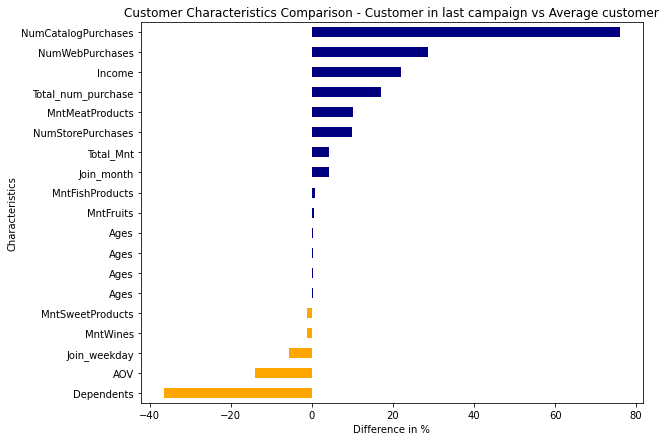

In [95]:
# visualize the differences
plt.figure(figsize = (9, 7))
value1 = pd.DataFrame((((cp_last.mean()) - df2.mean()) / df2.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Average customer")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics");

In [96]:
cp__the_rest2.mean()

Income                 70849.400000
Dependents                 0.020000
Join_month                 6.020000
Join_weekday               2.620000
MntWines                 166.080000
MntFruits                 50.920000
MntMeatProducts          142.140000
MntFishProducts          100.460000
MntSweetProducts         156.280000
NumWebPurchases            4.920000
NumCatalogPurchases        5.320000
NumStorePurchases          4.600000
Ages                      80.340000
Total_Mnt                630.600000
Total_num_purchase        21.380000
AOV                       31.203891
dtype: float64

Text(0, 0.5, 'Characteristics')

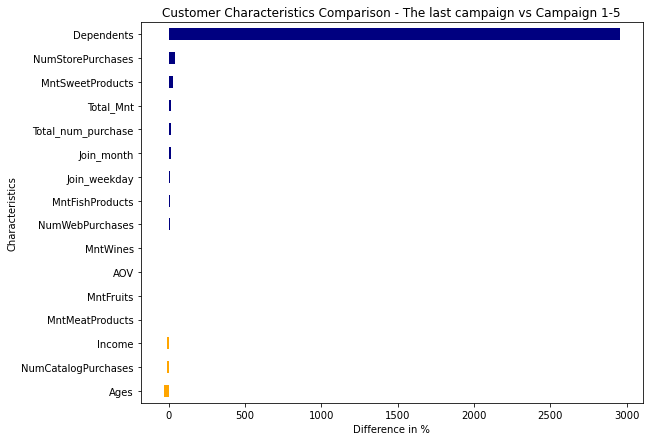

In [97]:
# visualize the differences
plt.figure(figsize = (9, 7))
value = pd.DataFrame((((cp_last.mean()) - cp__the_rest2.mean()) / cp__the_rest2.mean())*100)
value.dropna(inplace = True)
value.sort_values(by=0,inplace = True)
value['positive'] = value[0] >=0
value[0].plot(kind='barh', color=value.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")


In [98]:
# select columns to plot
new_df2 = df_copy[df_copy.AOV <= (df_copy.AOV.mean()+3*df_copy.AOV.std())]
new_df2.replace([np.inf, -np.inf], 0, inplace=True)
new_df2 = new_df2[new_df2.Total_num_purchase <= (new_df2.Total_num_purchase.mean()+3*new_df2.Total_num_purchase.std())]
new_df2 = new_df2[new_df2.Total_Mnt <= (new_df2.Total_Mnt.mean()+3*new_df2.Total_Mnt.std())]

In [99]:
# drop ID as everyone has unique ID
rd_df = df_copy.drop(columns=['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'])
df_copy.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)


X=rd_df.drop(columns=['Total_accept'])  # Features
y=rd_df['Total_accept']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Create a Random Forest Classifier with 100 trees
rg2 = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets 
rg2.fit(X_train, y_train)

y_pred=rg2.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01654119021784492
Mean Squared Error: 0.019186378432518154
Root Mean Squared Error: 0.13851490328667942


In [100]:
list_ = ['MntWines', 'MntMeatProducts','MntGoldProds', 'MntFishProducts', 'MntFruits',  'MntSweetProducts']
for i in list_:
    r, p_value  =  pearsonr(x=df_copy[i], y=df_copy['Total_accept'])
    print(i, "vs Total_accept:")
    # print results
    print('Pearson correlation (r): ', r)
    print('Pearson p-value: ', p_value)
    print(" ")

MntWines vs Total_accept:
Pearson correlation (r):  -0.0018014440994716364
Pearson p-value:  0.7188583584396974
 
MntMeatProducts vs Total_accept:
Pearson correlation (r):  0.059336631513445814
Pearson p-value:  1.7405369489111126e-32
 
MntGoldProds vs Total_accept:
Pearson correlation (r):  0.20404298238876611
Pearson p-value:  0.0
 
MntFishProducts vs Total_accept:
Pearson correlation (r):  0.012941108143487411
Pearson p-value:  0.009705604147794956
 
MntFruits vs Total_accept:
Pearson correlation (r):  0.008998413387387494
Pearson p-value:  0.07214532657978048
 
MntSweetProducts vs Total_accept:
Pearson correlation (r):  -0.0037965782089305474
Pearson p-value:  0.44804553985895207
 


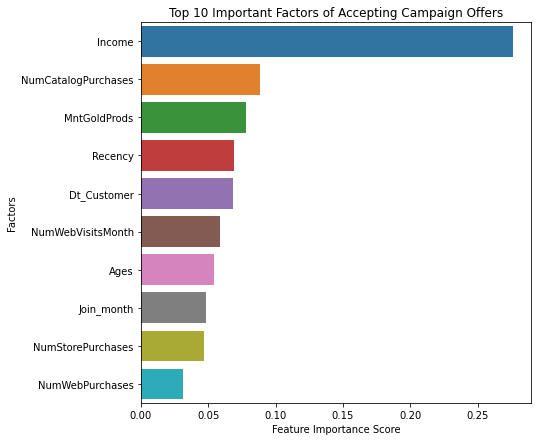

In [101]:
# find feature importance scores
feature_imp = pd.Series(rg2.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title("Top 10 Important Factors of Accepting Campaign Offers")
plt.show()

In [102]:
# drop ID as everyone has unique ID
rd_df = df_copy.drop(columns=['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Dt_Customer'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)
# One-hot encoding
rd_df = pd.get_dummies(rd_df)
# Split the dataset into X , y
X=rd_df.drop(columns=['Response'])  # Features
y=rd_df['Response']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Create a Random Forest Classifier with 100 trees
rg3 = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets 
rg3.fit(X_train, y_train)

y_pred=rg3.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0024376095484517153
Mean Squared Error: 0.0011403033970453218
Root Mean Squared Error: 0.03376837865585675


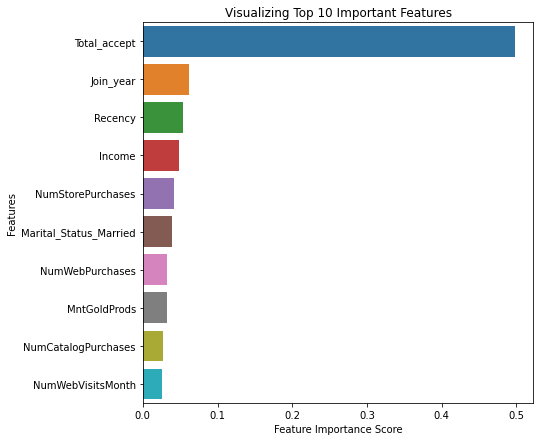

In [103]:
# find feature importance scores
feature_imp = pd.Series(rg3.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

In [104]:
#when did most new customers join
df_copy[['Join_month', 'Join_weekday']].mean()

Join_month      6.503293
Join_weekday    3.017428
dtype: float64

The average customer became a customer on Thursdays 
The average customer became a customer in Mid-June

In [105]:
# Function for response rate 
def response_rate(x) :
    return round(x.mean()*100, 4)

In [106]:
# Education
df_copy.groupby('Education')['Response'].agg(response_rate).sort_values(ascending = False)

Education
PhD           17.4867
Master        10.8138
Graduation    10.0204
2n Cycle       7.7138
Basic          0.1965
Name: Response, dtype: float64

In [107]:
# Marital_Status
df_copy.groupby('Marital_Status')['Response'].agg(response_rate).sort_values(ascending = False)

Marital_Status
Other      50.0000
Single     17.6291
Married     7.5912
Name: Response, dtype: float64

In [108]:
# Kidhome
df_copy.groupby('Kidhome')['Response'].agg(response_rate).sort_values(ascending = False)

Kidhome
0    14.0864
1     7.7733
2     2.8921
Name: Response, dtype: float64

In [109]:
# Teenhome
df_copy.groupby('Teenhome')['Response'].agg(response_rate).sort_values(ascending = False)

Teenhome
0    15.2834
1     7.0339
2     6.7797
Name: Response, dtype: float64

In [110]:
# Response rate is almost same for 1 or 2 teens in home.

In [111]:
# AcceptedCmp1
df_copy.groupby('AcceptedCmp1')['Response'].agg(response_rate).sort_values(ascending = False)

AcceptedCmp1
1    47.5100
0     8.8557
Name: Response, dtype: float64

In [112]:
# AcceptedCmp2
df_copy.groupby('AcceptedCmp2')['Response'].agg(response_rate).sort_values(ascending = False)

AcceptedCmp2
1    66.2791
0    10.5457
Name: Response, dtype: float64

In [113]:
# AcceptedCmp3
df_copy.groupby('AcceptedCmp3')['Response'].agg(response_rate).sort_values(ascending = False)

AcceptedCmp3
1    39.2794
0     9.1284
Name: Response, dtype: float64

In [114]:
# AcceptedCmp4
df_copy.groupby('AcceptedCmp4')['Response'].agg(response_rate).sort_values(ascending = False)

AcceptedCmp4
1    34.0510
0     9.4024
Name: Response, dtype: float64

In [115]:
# AcceptedCmp5
df_copy.groupby('AcceptedCmp5')['Response'].agg(response_rate).sort_values(ascending = False)

AcceptedCmp5
1    48.7633
0     8.4059
Name: Response, dtype: float64

In [116]:
# Complain
df_copy.groupby('Complain')['Response'].agg(response_rate).sort_values(ascending = False)

Complain
1    18.5090
0    11.1946
Name: Response, dtype: float64

In [117]:
# NumDealsPurchases
df_copy.groupby('NumDealsPurchases')['Response'].agg(response_rate).sort_values(ascending = False)

NumDealsPurchases
10    75.0000
11    60.0000
9     37.5000
0     34.8837
7     22.8571
6     20.0000
5     17.9775
1     17.6941
4     15.4762
3     11.0346
2     10.1124
8      7.1429
12     0.0000
13     0.0000
15     0.0000
Name: Response, dtype: float64

In [118]:
p = np.log(pd.crosstab(index = df.NumDealsPurchases, columns = df.Response)) # there are quite difference in value, so we transform value in log scale

fig = go.Figure()
fig.add_trace(go.Bar(
    x = p.index,
    y = p[0],
    name = 'Non response'))
fig.add_trace(go.Bar(
    x = p.index,
    y = p[1],
    name = 'Response'))
fig.update_layout(
    {
        "title": {
            "text": "<b>Logscale NumDealPurchases by response</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "NumDealPurchases",
            "dtick" : 1,
            "tickfont": {
                "size": 10                
            }
        },
        "yaxis": {
            "title": "Count in logscale",
            "tickfont": {
                "size": 10 
                }
        },
        "template":'plotly_white'
    }
)
fig.show()

In [119]:
# NumWebPurchases and NumStorePurchases

In [120]:
def bins_q(fea) : 
    q0 = np.quantile(df_copy[fea], 0)
    q1 = np.quantile(df_copy[fea], 0.33)
    q2 = np.quantile(df_copy[fea], 0.66)
    q3 = np.quantile(df_copy[fea], 1)
    return [q0, q1, q2, q3]
label = ['LF', 'MF', 'HF']

s1 = pd.cut(df_copy.NumWebPurchases, bins = bins_q('NumWebPurchases'), labels = label)
s2 = pd.cut(df_copy.NumStorePurchases, bins = bins_q('NumStorePurchases'), labels = label)

Web_Store = pd.concat([s1, s2, df_copy.Response], axis = 1)
Web_Store.head()

NumWebPurchases NumStorePurchases  Response
134              HF                HF         0
262              LF                LF         0
394              LF                LF         0
449              HF               NaN         0
525              HF                MF         0

In [121]:
Web_Store.groupby(['NumWebPurchases', 'NumStorePurchases'])['Response'].agg(response_rate).sort_values(ascending = False)

NumWebPurchases  NumStorePurchases
HF               LF                   25.7074
                 MF                   16.8025
MF               MF                   16.7802
                 HF                   13.7123
HF               HF                   13.2340
MF               LF                   12.5099
LF               HF                    7.7156
                 MF                    6.3307
                 LF                    4.1566
Name: Response, dtype: float64

In [122]:
# Categorized income in 3 income groups low, medium and high

In [123]:
bins = [1000, 25000, 60000, 100000]
labels = ['Low Income', 'Middle Income', 'High Income']

s5 = pd.cut(df_copy.Income, bins = bins, labels = labels)
Income_Group = pd.concat([s5, df_copy.Response], axis = 1)
Income_Group.head()

Income  Response
134  Middle Income         0
262  Middle Income         0
394  Middle Income         0
449  Middle Income         0
525  Middle Income         0

In [124]:
p  = Web_Store.groupby(['NumWebPurchases', 'NumStorePurchases'])['Response'].agg(response_rate).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x = p.NumWebPurchases.unique(),
    y = p.loc[p.NumStorePurchases == 'LF', 'Response'],
    name = 'Store LF',
    text = p.loc[p.NumStorePurchases == 'LF', 'Response'],
    texttemplate = "%{text}%",
    marker_color = px.colors.sequential.RdBu[0]))

fig.add_trace(go.Bar(
    x = p.NumWebPurchases.unique(),
    y = p.loc[p.NumStorePurchases == 'MF', 'Response'],
    name = 'Store MF',
    text = p.loc[p.NumStorePurchases == 'MF', 'Response'],
    texttemplate = "%{text}%",
    marker_color = px.colors.sequential.RdBu[2]))

fig.add_trace(go.Bar(
    x = p.NumWebPurchases.unique(),
    y = p.loc[p.NumStorePurchases == 'HF', 'Response'],
    name = 'Store HF',
    text = p.loc[p.NumStorePurchases == 'HF', 'Response'],
    texttemplate = "%{text}%",
    marker_color = px.colors.sequential.RdBu[4]))

fig.update_layout(
    {
        "title": {
            "text": "<b>Categorized NumWebPurchases and NumStorePurchases and its Response rate</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Web Frequency",
            "showticklabels":True,
            "tickfont": {
                "size": 10                
            }
        },
        "yaxis": {
            "title": "Response rate",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white'
    }
)

fig.show()     

In [125]:
# Categorized age in 4 age group of Senior, Adult, Mature and youth
df_copy.groupby(['Age_Group'])['Response'].agg(response_rate).sort_values(ascending = False)

Age_Group
Adult     15.5820
Senior    12.3041
Mature     9.6319
Youth         NaN
Name: Response, dtype: float64

In [126]:
# Categorized income
Income_Group.groupby(['Income'])['Response'].agg(response_rate).sort_values(ascending = False)

Income
High Income      17.5415
Middle Income     7.5725
Low Income        6.3291
Name: Response, dtype: float64

In [127]:
# High income response rate is higher more than twice low income and middle income.

In [128]:
# Categorized Recency

In [129]:
bins = [0, 25, 75, 100]
labels = ['LF', 'MF', 'HF']

s6 = pd.cut(df_copy.Recency, bins = bins, labels = labels)
Rec = pd.concat([s6, df_copy.Response], axis = 1)
Rec.head()

Recency  Response
134      LF         0
262      LF         0
394      LF         0
449      LF         0
525      LF         0

In [130]:
Rec.groupby('Recency')['Response'].agg(response_rate).sort_values(ascending = False)

Recency
LF    25.9325
MF    12.9336
HF     7.1289
Name: Response, dtype: float64

In [131]:
# Strangely low frequency recency is highest as 25.9% while high frequency is smallest as 7.12%.

In [132]:
# Multivariate features analysis
# MntWines - Income group

In [133]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = np.log(df_copy.loc[df_copy.Response == 0, 'Income']),
    y = np.log(df_copy.loc[df_copy.Response == 0, 'MntWines']),
    name = 'Non Response',
    mode = 'markers'))
fig.add_trace(go.Scatter(
    x = np.log(df_copy.loc[df_copy.Response == 1, 'Income']),
    y = np.log(df_copy.loc[df_copy.Response == 1, 'MntWines']),
    name = 'Response',
    mode = 'markers'))
fig.update_layout(
    {
        "title": {
            "text": "<b>Exponential distribution MntWines and Income by Response</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Income(logscale)",
            "showticklabels":True,
            "tickfont": {
                "size": 10                
            }
        },
        "yaxis": {
            "title": "MntWines(logscale)",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white'
    }
)
fig.show()

In [134]:
# Response group is located intesively at upper-right.